In [68]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer


In [69]:
df = pd.read_csv('./data/subreddit_data_1000.csv') #Read scraped data

In [70]:
df.head() #View first 5 rows

,Unnamed: 0,title,selftext,subreddit,created_utc
0,0,Accidentally deposited rollover check into my ...,My company closed out my old 401k and I electe...,personalfinance,1637254286
1,1,Unemployment Advice,I have been working for my current employers f...,personalfinance,1637254255
2,2,Where does the interest in compound interest c...,This may be a stupid question but I feel like ...,personalfinance,1637254028
3,3,Debt Settlement and Inflation,I see a lot of posts lately on credit card com...,personalfinance,1637254017
4,4,Taking out money from trad. IRA to put into Ro...,I had a traditional IRA with primerica and I r...,personalfinance,1637253836


In [71]:
df.drop(columns = 'Unnamed: 0',inplace = True) #Drop extra index column

In [72]:
df.groupby('subreddit')['created_utc'].count() #Count posts for each subreddit

subreddit
cscareerquestions    1500
personalfinance      1500
Name: created_utc, dtype: int64

In [73]:
# Create separate subreddit for cscareerquestions
df_cs = df[df['subreddit'] == 'cscareerquestions']
df_cs.head()

,title,selftext,subreddit,created_utc
1500,Anyone graduated/currently enrolled in U Washi...,Would like to connect and clarify some doubts....,cscareerquestions,1637254319
1501,possible implications in returning to work in ...,I've held off my cs studies for most of covid ...,cscareerquestions,1637254205
1502,VR Career Advice,My background is in designing and programming ...,cscareerquestions,1637253634
1503,Professional resume writing service?,[removed],cscareerquestions,1637253631
1504,Has being completely honest and upfront about ...,"Hello,\n\nI hate playing the game of salary ne...",cscareerquestions,1637253246


In [74]:
## Create separate subreddit for cscareerquestions
df_pf = df[df['subreddit'] == 'personalfinance']
df_pf.head()

,title,selftext,subreddit,created_utc
0,Accidentally deposited rollover check into my ...,My company closed out my old 401k and I electe...,personalfinance,1637254286
1,Unemployment Advice,I have been working for my current employers f...,personalfinance,1637254255
2,Where does the interest in compound interest c...,This may be a stupid question but I feel like ...,personalfinance,1637254028
3,Debt Settlement and Inflation,I see a lot of posts lately on credit card com...,personalfinance,1637254017
4,Taking out money from trad. IRA to put into Ro...,I had a traditional IRA with primerica and I r...,personalfinance,1637253836


In [75]:
df_pf.drop_duplicates(subset = 'selftext',inplace=True) #Drop duplicates

<ipython-input-75-89fd45039a25>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pf.drop_duplicates(subset = 'selftext',inplace=True) #Drop duplicates


In [76]:
df_pf.shape #Shape of this data after duplicates drop

(1253, 4)

In [77]:
df_cs.drop_duplicates(subset = 'selftext',inplace=True)

<ipython-input-77-44cfffebe3e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cs.drop_duplicates(subset = 'selftext',inplace=True)


In [78]:
df_cs.shape #Shape of this data after duplicates drop

(1180, 4)

In [79]:
#Show the number of NaN values in the two subreddit dataframes
print('NaN Values in CS Career Questions Subreddit posts')
print(df_cs.isna().sum()) #We see 1 NaN value to clean in df_cs
print('NaN Values in Personal Finance Subreddit posts')
print(df_pf.isna().sum()) #We see 1 NaN value to clean in 

NaN Values in CS Career Questions Subreddit posts
title          0
selftext       1
subreddit      0
created_utc    0
dtype: int64
NaN Values in Personal Finance Subreddit posts
title          0
selftext       1
subreddit      0
created_utc    0
dtype: int64


#### Let's go ahead and drop these NaN values:

In [80]:
print(df_cs[df_cs.isna().any(axis=1)]) #The NaN value in this data
df_cs = df_cs.dropna()


                                                  title selftext  \
1657  [Google / FB] Recruiter wants me to name comp ...      NaN   

              subreddit  created_utc  
1657  cscareerquestions   1637190185  


In [81]:
print(df_pf[df_pf.isna().any(axis=1)]) #The NaN value in this data
df_pf = df_pf.dropna()


                                                title selftext  \
78  I’m 25 and I have 40k in savings and 23k in IR...      NaN   

          subreddit  created_utc  
78  personalfinance   1637241680  


In [82]:
print('NaN Values in CS Career Questions Subreddit posts')
print(df_cs.isna().sum()) #We see 1 NaN value to clean in df_cs
print('NaN Values in Personal Finance Subreddit posts')
print(df_pf.isna().sum()) #We see 1 NaN value to clean in 

NaN Values in CS Career Questions Subreddit posts
title          0
selftext       0
subreddit      0
created_utc    0
dtype: int64
NaN Values in Personal Finance Subreddit posts
title          0
selftext       0
subreddit      0
created_utc    0
dtype: int64


In [83]:
# Adding word count and status length for each subreddit data frame
def word_counts(df):
    df['post_word_count'] = [len(df['selftext'].iloc[i].split(' ')) for i, status in enumerate(df['selftext'])]
    df['post_length'] = [len(df['selftext'].iloc[i]) for i, status in enumerate(df['selftext'])]
    return df

df_cs = word_counts(df_cs)
df_pf = word_counts(df_pf)

In [84]:
df_cs.head()
df_pf.head()

,title,selftext,subreddit,created_utc,post_word_count,post_length
0,Accidentally deposited rollover check into my ...,My company closed out my old 401k and I electe...,personalfinance,1637254286,126,663
1,Unemployment Advice,I have been working for my current employers f...,personalfinance,1637254255,692,3762
2,Where does the interest in compound interest c...,This may be a stupid question but I feel like ...,personalfinance,1637254028,171,970
3,Debt Settlement and Inflation,I see a lot of posts lately on credit card com...,personalfinance,1637254017,49,279
4,Taking out money from trad. IRA to put into Ro...,I had a traditional IRA with primerica and I r...,personalfinance,1637253836,201,1015


In [85]:
# Function for plotting the distributions of word count and post lengths
def plot_length_distributions(df):
    plt.tight_layout()
    plt.figure(figsize = (8,5));
    df['post_word_count'].hist()
    plt.title('Distribution of Posts by Word Count',fontsize = 20)
    plt.xlabel('Word Count',fontsize = 18);
    plt.ylabel('Frequency',fontsize=18);

    plt.figure(figsize = (8,5));
    df['post_length'].hist()
    plt.title('Distribution of Posts by Character Length',fontsize = 20)
    plt.xlabel('Character Length',fontsize = 18);
    plt.ylabel('Frequency',fontsize=18);



## Word Count and Post Length for r/CSCareerQuestions

<Figure size 432x288 with 0 Axes>

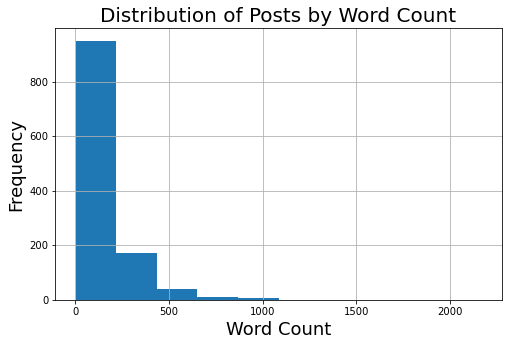

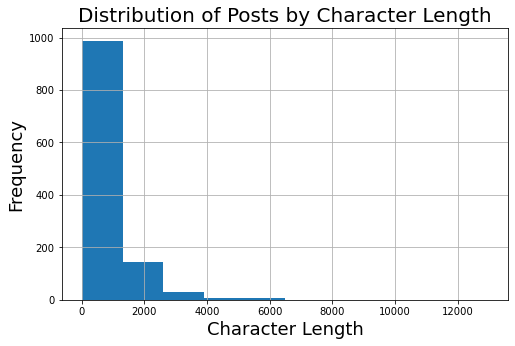

In [86]:
plot_length_distributions(df_cs);

## Word Count and Post Length for r/personalfinance

<Figure size 432x288 with 0 Axes>

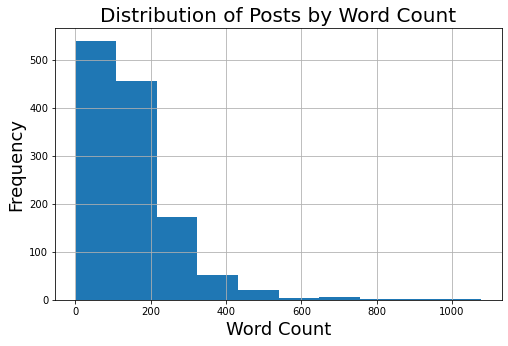

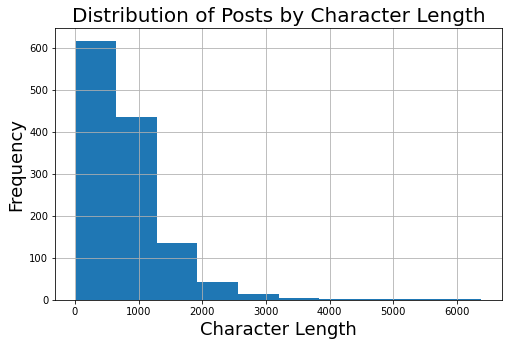

In [87]:
plot_length_distributions(df_pf)

### Now let's begin the analysis of the actual texts themselves. To do this, we will have to first vectorize the texts (create numerical features) and make a dataframe of these vectors  

In [88]:
# Count vectorizer generator function for definining 
# single words, bigrams, and trigrams
def cvec_generator(df,ngrams = 1):
    
    cvec = CountVectorizer(stop_words = 'english',ngram_range = (ngrams,ngrams))
    print(cvec)
    X = df['selftext']
    cvec.fit(X)
    X_cvec = cvec.transform(X)
    X_cvec.shape

    X_cvec_df = pd.DataFrame(X_cvec.todense(), 
                              columns=cvec.get_feature_names())
    return X_cvec_df




In [89]:
# Function for plotting the top 15 most common words/bigrams/trigrams
def word_plots(df,cs_or_pf,n_gram_length):
    subreddit_dic = {'cs':'r/CSCareerQuestions','pf':'r/PersonalFinance'}
    subr = subreddit_dic[cs_or_pf]
    
    ngram_dict = {1:'Words',2:'Bigrams',3:'Trigrams'}
    ngrm = ngram_dict[n_gram_length]
    plt.tight_layout()
    plt.figure(figsize=(10,5))
    df.sum().sort_values(ascending=False).head(15).sort_values().plot(kind = 'barh')
    plt.title(f'Top 15 Most Common {ngrm} for {subr}');



In [90]:
#Count vectorizers using the cvec_generator function
X_cvec_cs = cvec_generator(df_cs)
X_cvec_pf = cvec_generator(df_pf)
X_cvec_cs_bi = cvec_generator(df_cs,ngrams = 2)
X_cvec_pf_bi = cvec_generator(df_pf,ngrams = 2)
X_cvec_cs_tri = cvec_generator(df_cs,ngrams = 3)
X_cvec_pf_tri = cvec_generator(df_pf,ngrams = 3)
X_cvecs = ['X_cvec_cs','X_cvec_pf','X_cvec_cs_bi','X_cvec_pf_bi','X_cvec_cs_tri','X_cvec_pf_tri']

CountVectorizer(stop_words='english')
CountVectorizer(stop_words='english')
CountVectorizer(ngram_range=(2, 2), stop_words='english')
CountVectorizer(ngram_range=(2, 2), stop_words='english')
CountVectorizer(ngram_range=(3, 3), stop_words='english')
CountVectorizer(ngram_range=(3, 3), stop_words='english')


<Figure size 432x288 with 0 Axes>

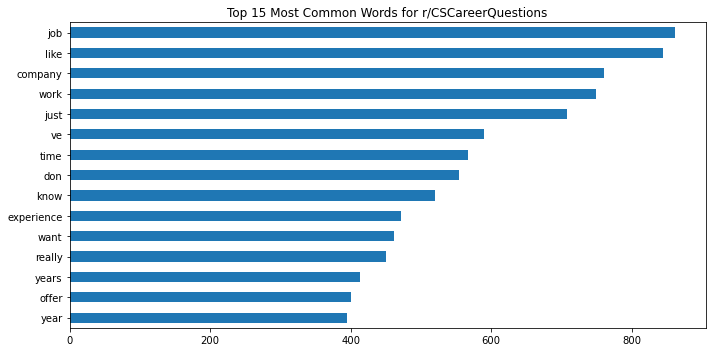

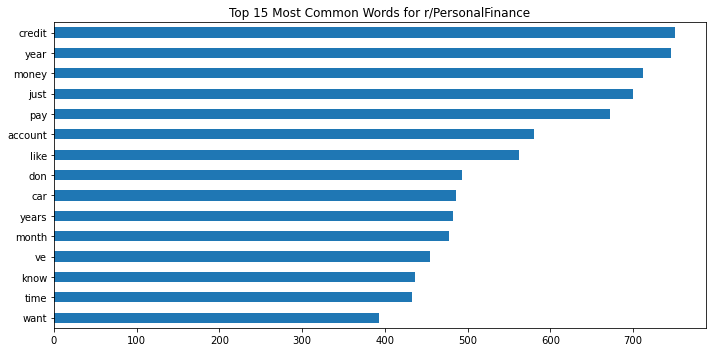

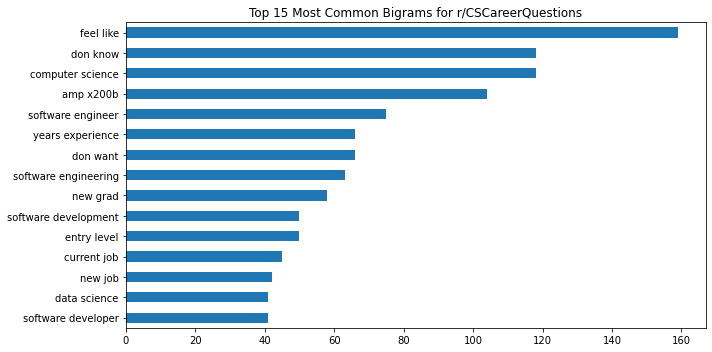

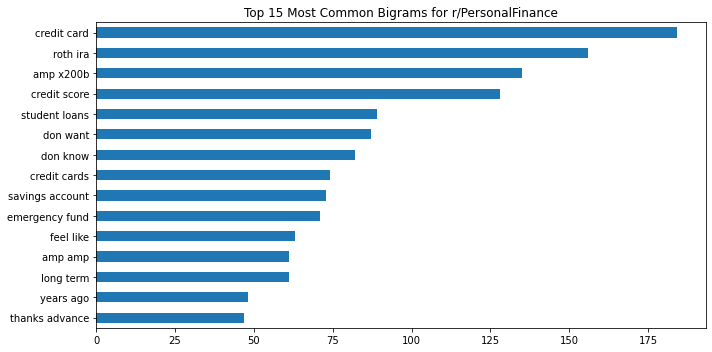

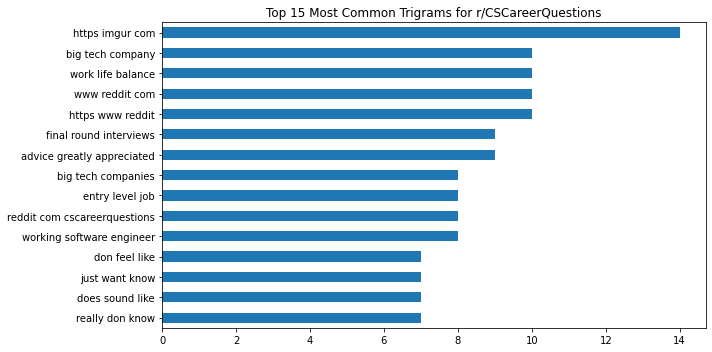

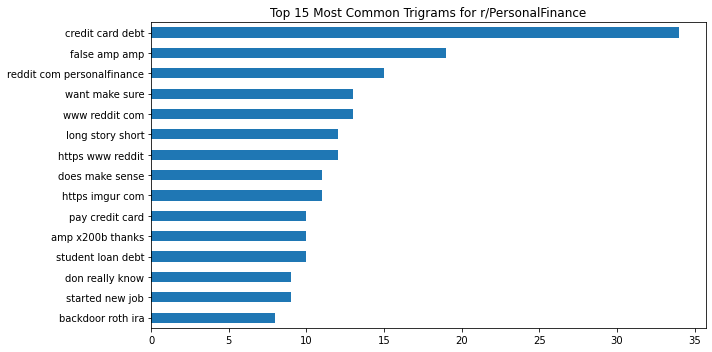

In [91]:
# Plotting and saving the top common words/bigrams/trigrams
for i, x in enumerate(X_cvecs):
    if i % 2 == 0:
        cs_or_pf = 'cs'
    elif i % 2 == 1:
        cs_or_pf = 'pf'
    
    if 'bi' in x:
        n_gram_length = 2
    elif 'tri' in x:
        n_gram_length = 3
    else:
        n_gram_length = 1
    
    word_plots(globals()[X_cvecs[i]],cs_or_pf,n_gram_length)
    plt.tight_layout()
    plt.savefig(f'./images/{cs_or_pf}_Ngram_length{n_gram_length}')

In [92]:
df_cs.shape, X_cvec_cs.shape

((1179, 6), (1179, 8551))

In [93]:
df_merged = pd.concat([df_cs,df_pf])

In [94]:
df_merged['subreddit'].value_counts()


personalfinance      1252
cscareerquestions    1179
Name: subreddit, dtype: int64

In [95]:
# 
df_merged['subreddit'] = df_merged['subreddit'].map({'cscareerquestions':1,'personalfinance':0})

In [96]:
df_merged['subreddit'].value_counts()

0    1252
1    1179
Name: subreddit, dtype: int64

In [97]:
df_merged.to_csv('data/clean_subreddit_data.csv',index=False)

### References:

[Python Optional Arguments](https://realpython.com/python-optional-arguments/)

[Convert a String to Variable Name in Python](https://www.delftstack.com/howto/python/python-string-to-variable-name/)